# Ford GoBike System Data Analysis
## by Anshul Rampal

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Read Csv File 
df=pd.read_csv("/Users/anshulrampal/Downloads/201810-fordgobike-tripdata.csv")

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80066,2018-10-31 20:49:03.1400,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.750900,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No
1,56428,2018-10-31 20:18:02.8810,2018-11-01 11:58:31.1460,75.0,Market St at Franklin St,37.773793,-122.421239,86.0,Market St at Dolores St,37.769305,-122.426826,1798,Customer,NaN,NaN,No
2,44825,2018-10-31 20:07:13.3780,2018-11-01 08:34:19.3670,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,122.0,19th St at Mission St,37.760299,-122.418892,1575,Customer,1983.0,Female,No
3,55461,2018-10-31 17:06:37.6830,2018-11-01 08:30:59.2200,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,2978,Subscriber,1992.0,Female,No
4,47724,2018-10-31 18:27:36.8230,2018-11-01 07:43:01.5610,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,2392,Customer,NaN,NaN,No


In [5]:
# Check the shape of the dataset
df.shape

(201458, 16)

In [6]:
# Gather information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201458 entries, 0 to 201457
Data columns (total 16 columns):
duration_sec               201458 non-null int64
start_time                 201458 non-null object
end_time                   201458 non-null object
start_station_id           200102 non-null float64
start_station_name         200102 non-null object
start_station_latitude     201458 non-null float64
start_station_longitude    201458 non-null float64
end_station_id             200102 non-null float64
end_station_name           200102 non-null object
end_station_latitude       201458 non-null float64
end_station_longitude      201458 non-null float64
bike_id                    201458 non-null int64
user_type                  201458 non-null object
member_birth_year          192804 non-null float64
member_gender              192818 non-null object
bike_share_for_all_trip    201458 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 24.6+ MB


In [7]:
# Gather description (mean,percentile) of the dataset.
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,201458.000000,200102.000000,201458.000000,201458.000000,200102.000000,201458.000000,201458.000000,201458.000000,192804.000000
mean,805.188372,124.177025,37.766632,-122.348753,123.134651,37.766740,-122.348246,2304.089512,1983.983719
std,1933.750483,104.527250,0.106106,0.123701,104.841480,0.105976,0.123103,1283.170088,10.153158
min,61.000000,3.000000,37.317298,-122.446546,3.000000,37.317298,-122.446546,11.000000,1888.000000
25%,353.000000,36.000000,37.770407,-122.411306,30.000000,37.771058,-122.408915,1228.000000,1979.000000
50%,557.000000,90.000000,37.781010,-122.397086,90.000000,37.781074,-122.395936,2316.000000,1986.000000
75%,861.000000,197.000000,37.795913,-122.287610,196.000000,37.797280,-122.289415,3368.000000,1991.000000
max,86205.000000,378.000000,37.880222,-121.874119,378.000000,37.880222,-121.874119,4464.000000,2000.000000


In [8]:
# Check columns present in the dataset
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [9]:
# Check if there are null values present in the dataset
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [10]:
# Check how many null values are present in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id           1356
start_station_name         1356
start_station_latitude        0
start_station_longitude       0
end_station_id             1356
end_station_name           1356
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8654
member_gender              8640
bike_share_for_all_trip       0
dtype: int64

In [11]:
# Drop null records from the dataset and create a new dataset df2
df2=df.dropna().reset_index(drop=True)

In [12]:
# Check the shape of the new dataset
df2.shape

(191485, 16)

In [13]:
# Check columns present in the new dataset
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [14]:
# Analyse unique values in column of the new dataset
df2['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Analyse unique values in column of the new dataset
df2['member_gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [16]:
# Analyse unique values in column of the new dataset
df2['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

### What is the structure of your dataset?

> The data has 201458 records with 16 columns. Also, when we used df.isnull().sum() query on this data set, we got to know that there are null values present in columns/missing values present in columns. So in order to have accurate data for exploration, we used data cleaning approach by dropping all the null valued records. The current structure of the data set which will be used as part of the exploration process contains 191485 records with 16 columns.

### What is/are the main feature(s) of interest in your dataset?

> The major features of interest to check would be to check what is the average ride time taken by the users, what is the most preferable source and destination points, which age user are more likely to take the rides and which is the  particular day of the week when most riders take rides.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that would be helpful would be the duration in seconds, the start station name, the end station name, user type and age.

## Univariate Exploration

> In this section, we investigated distributions of individual variables. If we came across any unusual points or outliers, we took a deeper look to clean things up
and prepare ourself to look at relationships between variables.

In [17]:
# Analyse columns of interest
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

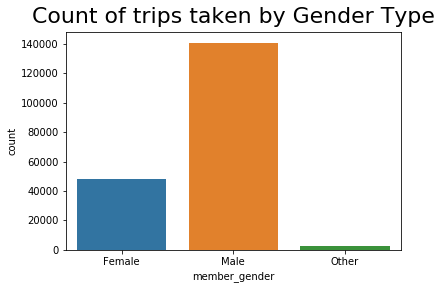

In [18]:
sb.countplot(data=df2,x='member_gender');
plt.title('Count of trips taken by Gender Type', fontsize=22, y=1.015)
plt.savefig('image01.png');

Gender Male have taken more number of rides as compared to the female gender and others.

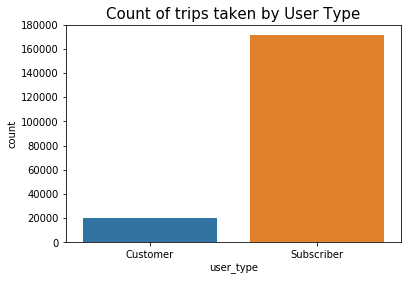

In [19]:
sb.countplot(data=df2,x='user_type');
plt.title('Count of trips taken by User Type', fontsize=15)
plt.savefig('image02.png');

Subscriber are more likely to take rides than non-subscribers.

In [20]:
df2['start_station_name'].value_counts()[:20]

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4528
Market St at 10th St                                               3939
San Francisco Ferry Building (Harry Bridges Plaza)                 3623
Powell St BART Station (Market St at 4th St)                       3377
Berry St at 4th St                                                 3364
Montgomery St BART Station (Market St at 2nd St)                   3323
San Francisco Caltrain (Townsend St at 4th St)                     3285
The Embarcadero at Sansome St                                      3067
Steuart St at Market St                                            2903
Howard St at Beale St                                              2579
Powell St BART Station (Market St at 5th St)                       2360
Embarcadero BART Station (Beale St at Market St)                   2314
2nd St at Townsend St                                              2072
Beale St at Harrison St                                         

In [21]:
df2['end_station_name'].value_counts()[:20]

San Francisco Caltrain Station 2  (Townsend St at 4th St)          5874
San Francisco Ferry Building (Harry Bridges Plaza)                 4222
Market St at 10th St                                               3961
San Francisco Caltrain (Townsend St at 4th St)                     3740
Montgomery St BART Station (Market St at 2nd St)                   3510
Powell St BART Station (Market St at 4th St)                       3488
The Embarcadero at Sansome St                                      3414
Berry St at 4th St                                                 3359
Steuart St at Market St                                            3023
Howard St at Beale St                                              2504
Powell St BART Station (Market St at 5th St)                       2441
Townsend St at 7th St                                              2312
Beale St at Harrison St                                            2254
Embarcadero BART Station (Beale St at Market St)                

After analyzing the start station name and end station name, we can easily see that the preferred station is "San Francisco Caltrain Station 2  (Townsend St at 4th St)"

In [22]:
# Creating a new column member_age from member_birth_year column
df2['member_age'] = 2018-df2['member_birth_year']

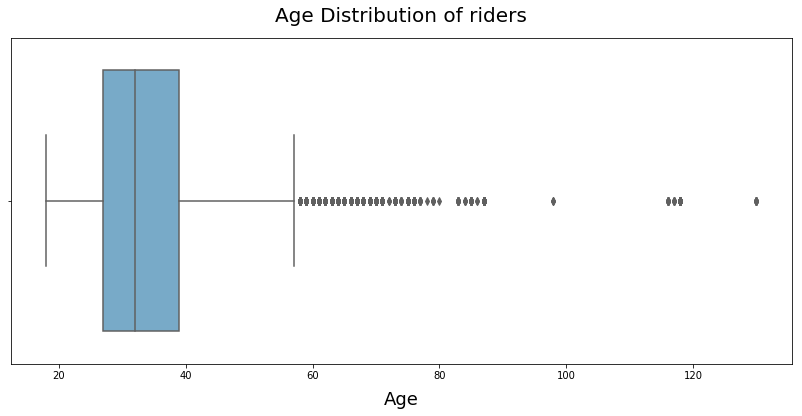

In [23]:
plt.figure(figsize=(14,6))
sb.boxplot(x='member_age', data=df2, palette='Blues', orient='h')
plt.title("Age Distribution of riders", fontsize=20, y=1.03)
plt.xlabel("Age", fontsize=18, labelpad=10);
plt.savefig('image03.png');

Seems like there are people above the age of 100 and these can be considered as outliers.

In [24]:
# Dropping records where member age is greater than 100 
df2=df2[df2.member_age<100]
df2.reset_index(drop=True)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,80066,2018-10-31 20:49:03.1400,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.750900,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No,31.0
1,44825,2018-10-31 20:07:13.3780,2018-11-01 08:34:19.3670,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,122.0,19th St at Mission St,37.760299,-122.418892,1575,Customer,1983.0,Female,No,35.0
2,55461,2018-10-31 17:06:37.6830,2018-11-01 08:30:59.2200,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,2978,Subscriber,1992.0,Female,No,26.0
3,32818,2018-10-31 20:54:06.5050,2018-11-01 06:01:05.3020,345.0,Hubbell St at 16th St,37.766474,-122.398295,109.0,17th St at Valencia St,37.763316,-122.421904,1466,Customer,1975.0,Male,No,43.0
4,18888,2018-10-31 21:43:43.0640,2018-11-01 02:58:31.2400,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,74.0,Laguna St at Hayes St,37.776435,-122.426244,4452,Subscriber,1995.0,Female,No,23.0
5,1786,2018-10-31 23:44:10.7030,2018-11-01 00:13:56.9500,323.0,Broadway at Kearny,37.798014,-122.405950,27.0,Beale St at Harrison St,37.788059,-122.391865,4050,Subscriber,1977.0,Male,No,41.0
6,1752,2018-10-31 23:40:10.4300,2018-11-01 00:09:23.0920,81.0,Berry St at 4th St,37.775880,-122.393170,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1525,Subscriber,1986.0,Other,Yes,32.0
7,577,2018-10-31 23:58:54.3210,2018-11-01 00:08:31.8830,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,122.0,19th St at Mission St,37.760299,-122.418892,4436,Subscriber,1994.0,Male,No,24.0
8,689,2018-10-31 23:53:01.3390,2018-11-01 00:04:30.6910,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,55.0,Webster St at Grove St,37.777053,-122.429558,2103,Subscriber,1992.0,Male,No,26.0
9,245,2018-10-31 23:57:15.3810,2018-11-01 00:01:21.0630,308.0,San Pedro Square,37.336802,-121.894090,305.0,Ryland Park,37.342725,-121.895617,254,Subscriber,1995.0,Male,Yes,23.0


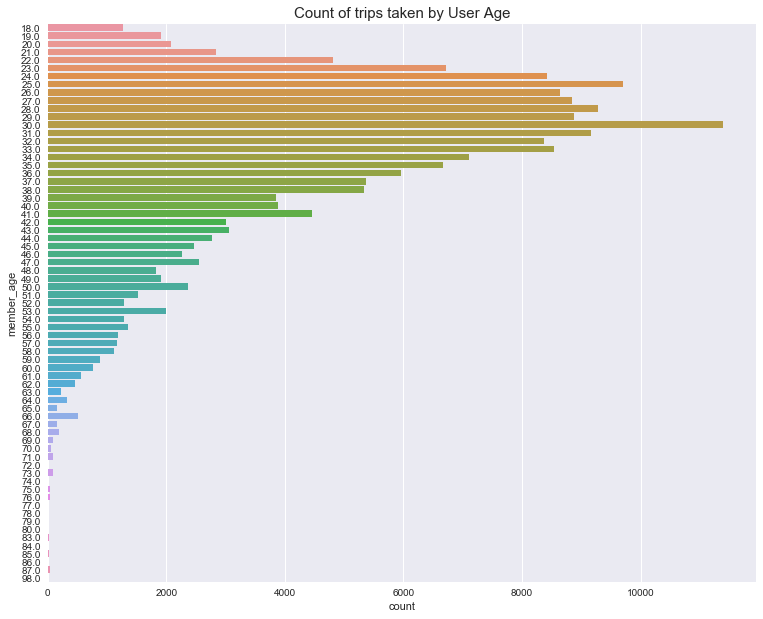

In [25]:
# Check which age people are more likely to take a ride.
sb.set(rc={'figure.figsize':(12.7,10.27)})
sb.countplot(data=df2,y='member_age');
plt.title('Count of trips taken by User Age', fontsize=15)
plt.savefig('image04.png');

30 age people are more likely to book a ride. Senior citizens are less likely to book a ride. So, above the age of 65, we can provide concessions and promotions.

In [26]:
# Descriptive Analysis of age of riders taking rides.
df2['member_birth_year'].value_counts()

1988.0    11382
1993.0     9706
1990.0     9286
1987.0     9170
1989.0     8875
1991.0     8850
1992.0     8633
1985.0     8540
1994.0     8421
1986.0     8369
1984.0     7111
1995.0     6715
1983.0     6671
1982.0     5963
1981.0     5370
1980.0     5335
1996.0     4818
1977.0     4449
1978.0     3884
1979.0     3844
1975.0     3055
1976.0     2999
1997.0     2844
1974.0     2778
1971.0     2560
1973.0     2466
1968.0     2368
1972.0     2262
1998.0     2072
1965.0     2003
          ...  
1961.0     1177
1960.0     1118
1959.0      890
1958.0      768
1957.0      568
1952.0      506
1956.0      466
1954.0      320
1955.0      224
1950.0      191
1953.0      162
1951.0      161
1945.0       88
1947.0       86
1949.0       81
1948.0       59
1942.0       40
1931.0       34
1943.0       32
1933.0       24
1935.0       16
1941.0       11
1944.0       10
1939.0        7
1934.0        5
1946.0        3
1920.0        3
1932.0        2
1940.0        1
1938.0        1
Name: member_birth_year,

In [27]:
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['start_time_year_month_renamed'] = df2['start_time'].dt.strftime('%y' + '-' + '%m')
df2['datetime'] = pd.to_datetime(df2['start_time'])

In [28]:
x,y=df2.shape
list=[]
for i in range(x):
    list.append(df2['datetime'].iloc[i].strftime('%A'))

In [29]:
df2['weekday']=pd.DataFrame(list, columns=['weekday'])

In [30]:
df2.iloc[0]

duration_sec                                          80066
start_time                       2018-10-31 20:49:03.140000
end_time                           2018-11-01 19:03:30.0550
start_station_id                                        138
start_station_name                   Jersey St at Church St
start_station_latitude                              37.7509
start_station_longitude                            -122.427
end_station_id                                          147
end_station_name                     29th St at Tiffany Ave
end_station_latitude                                37.7441
end_station_longitude                              -122.421
bike_id                                                3458
user_type                                          Customer
member_birth_year                                      1987
member_gender                                        Female
bike_share_for_all_trip                                  No
member_age                              

In [31]:
100*38417/df2.shape[0]

20.070948664096214

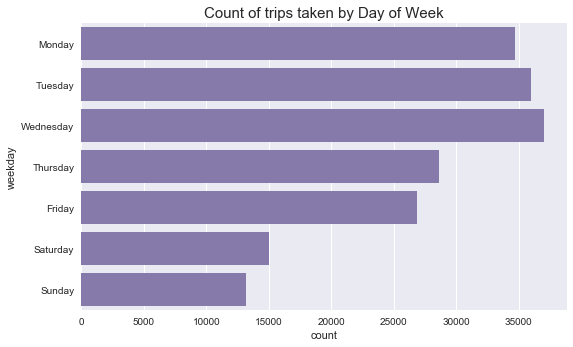

In [32]:
sb.set(rc={'figure.figsize':(8.7,5.27)})
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color=sb.color_palette()[3]
sb.countplot(data=df2,y='weekday',color=base_color,order=day_order);
plt.title('Count of trips taken by Day of Week', fontsize=15)
plt.savefig('image05.png');

Maximum number of rides were taken on Wednesday followed by Tuesday. On Saturday and Sunday, less rides were taken.

In [33]:
type_counts=df2['weekday'].value_counts()
per=[]
for i in range(type_counts.shape[0]):
    count=type_counts[i]
    pct_string='{:01f}%'.format(100*count/df2.shape[0])
    per.append(pct_string)
per

['19.330115%',
 '18.784155%',
 '18.124824%',
 '14.969228%',
 '14.027773%',
 '7.836745%',
 '6.885887%']

Most people took ride on Wednesday (19%) followed by Tuesday (18.7%) and Monday(18.1%). Least rides were taken on Sunday(7%).

In [34]:
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'start_time_year_month_renamed', 'datetime', 'weekday'],
      dtype='object')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The feature columns of interests were the duration_sec,member_birth_year,user_type,member_gender. We derived few columns from existing columns. For instance, we derived column age from member_birth_year and also we derived weekday from start_time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Closely looking at the distributions, we came across untidy data/outliers. Specially in member_birth_year, we had people of age more than 100. We dropped the records in order to make sure our analysis is of greater accuracy.

## Bivariate Exploration

> In this section,  we investigated relationships between pairs of variables in our
data.

In [35]:
# Analysing data for Member_Gender and Bike_Share_for_all_trips columns and 
# checking relationships between the two variables.
df['bike_share_for_all_trip'].value_counts()

No     182932
Yes     18526
Name: bike_share_for_all_trip, dtype: int64

In [36]:
# Analysing data and comparing the relationship of the two variables.

ct_counts=df2.groupby(['member_gender','bike_share_for_all_trip']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='member_gender',columns='bike_share_for_all_trip',values='count')
ct_counts

bike_share_for_all_trip,No,Yes
member_gender,,
Female,43353,4494
Male,127269,13337
Other,2402,551


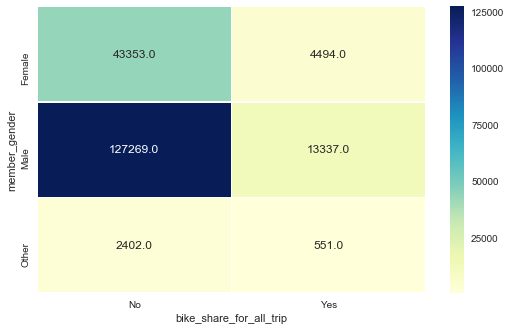

In [37]:
sb.heatmap(ct_counts,annot=True,cmap="YlGnBu",fmt='.1f',linewidths=.5);
plt.savefig('image06.png');

Bivariate analysis for columns of interest : member_gender and bike_share_for_all_trips. Male members took more rides as compared to female members and also the bike share for all trip was a little more for male users.

In [38]:
ct_counts1=df2.groupby(['user_type','weekday']).size()
ct_counts1=ct_counts1.reset_index(name='count')
ct_counts1=ct_counts1.pivot(index='user_type',columns='weekday',values='count')
ct_counts1

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_type,,,,,,,
Customer,3068,2813,3249,2736,2429,2831,3214
Subscriber,23782,31879,11751,10444,26223,33123,33785


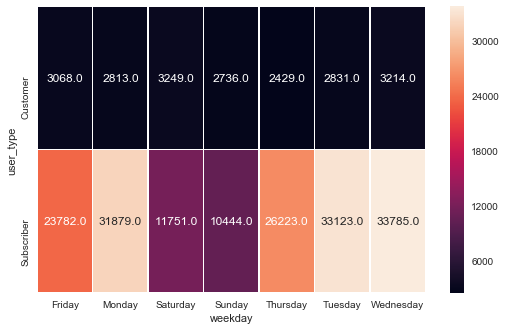

In [39]:
sb.heatmap(ct_counts1,annot=True,fmt='.1f',linewidths=.5);
plt.savefig('image07.png');

Bivariate Analysis of columns : weekday and user_type. We can easily see that subscriber used more rides on Wednesday.

In [40]:
# Deriving a new column duration_min from duration_sec
df2['duration_min'] = df2['duration_sec']/60

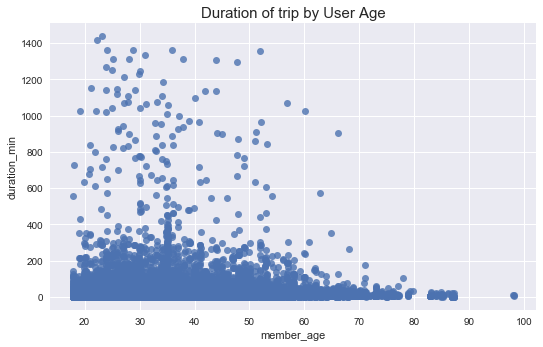

In [41]:
sb.regplot(data=df2,x='member_age',y='duration_min',fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2);
plt.title('Duration of trip by User Age', fontsize=15)
plt.savefig('image08.png');

Bivariate Analysis for columns : member_age and duration_min. Looking at the distribution,we can say that mostly people took rides within 400 minutes of duration and also elderly people took shorter rides less than 80 minute duration or even shorter than that.

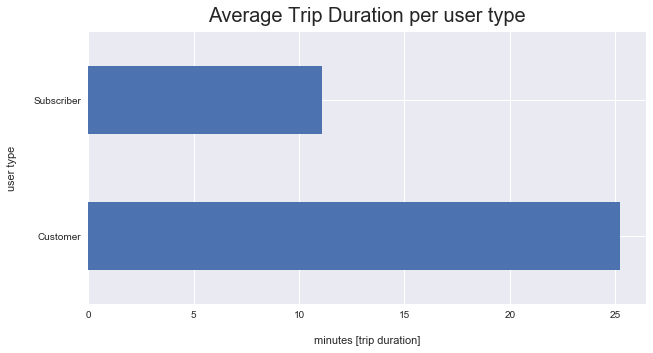

In [42]:
ax = df2.groupby('user_type')['duration_min'].mean().plot(kind='barh', figsize=(10,5))
ax.set_title('Average Trip Duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16);
plt.savefig('image09.png');

Subscriber took shorter rides as compared to the customer.

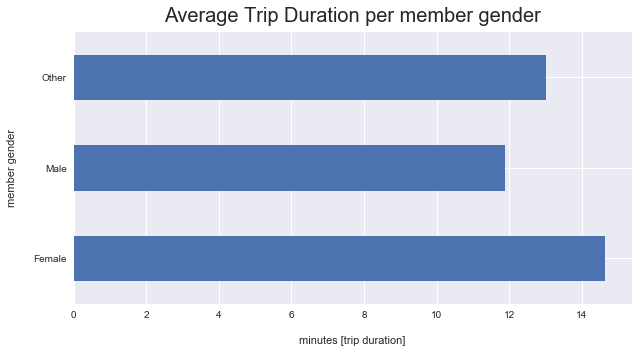

In [43]:
ax = df2.groupby('member_gender')['duration_min'].mean().plot(kind='barh', figsize=(10,5))
ax.set_title('Average Trip Duration per member gender', fontsize=20, y=1.015)
ax.set_ylabel('member gender', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16);
plt.savefig('image10.png');

Female's took longer duration rides than male and others.

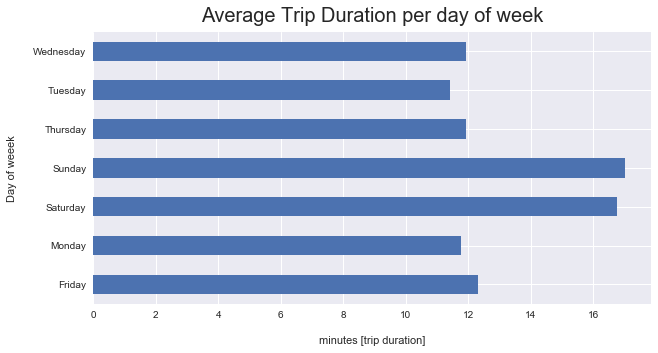

In [44]:
ax = df2.groupby('weekday')['duration_min'].mean().plot(kind='barh', figsize=(10,5))
ax.set_title('Average Trip Duration per day of week', fontsize=20, y=1.015)
ax.set_ylabel('Day of weeek', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16);
plt.savefig('image11.png');

Although most number of rides were taken Wednesday, the longer duration of rides were taken on Sunday and Saturday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> During multivariate analysis, we derived a new column duration_min from duration_sec since it is easier to get through the number. Also, looking at the visualisations, we observed interesting patterns and relationships between the two variables of interest. For instance, although most rides were taken on Wednesday followed by Tuesday, the longer duration rides were taken on weekends i.e. Saturday and Sunday.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When we applied bivariate Analysis for columns member_age and duration_min, we found that most of the people took rides within 400 minutes of duration.Interesting thing here to note is that elderly people took shorter rides less than 80 minute duration or even shorter than that.

## Multivariate Exploration

> We created plots of three or more variables to investigate our  data even
further.

In [45]:
# Analysing columns of interest
df2.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_year_month_renamed,datetime,weekday,duration_min
0,80066,2018-10-31 20:49:03.140,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.7509,-122.427411,147.0,29th St at Tiffany Ave,37.744067,...,3458,Customer,1987.0,Female,No,31.0,18-10,2018-10-31 20:49:03.140,Wednesday,1334.433333


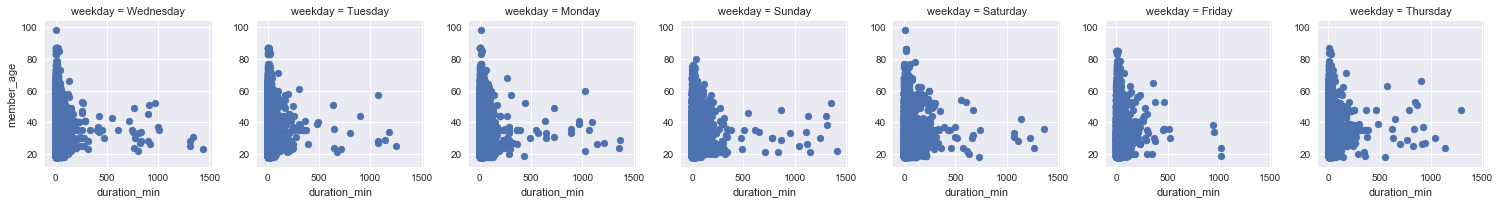

In [46]:
# Using Faceting for multivariate analysis
g=sb.FacetGrid(data=df2,col='weekday')
g.map(plt.scatter,'duration_min','member_age');
plt.savefig('image12.png');

Only on Friday, the duration of rides was less than 500 min (mostly)

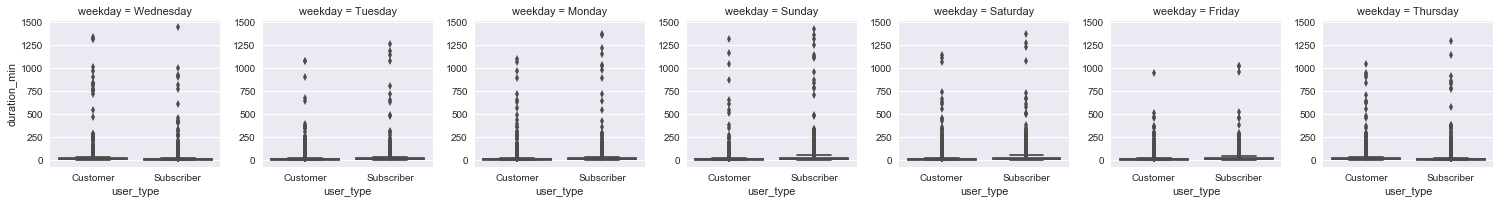

In [47]:
# Using Faceting for multivariate analysis
g = sb.FacetGrid(data = df2, col = 'weekday')
g.map(sb.boxplot, 'user_type', 'duration_min');
plt.savefig('image13.png');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> If we check the relationship between three variables, we find that on Sunday, duration of rides by Customer and Subscriber were almost same (the longest duration on all days). 